# [1] plot_mit.py ; Mott insulator transition

- single band Hubbard model
- Bethe lattice of infinity dimension
- 

### 1. reference


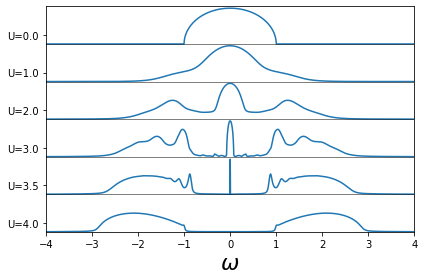

In [3]:
# %load plot_mit.py
r"""
===================================
The Metal Mott Insulator transition
===================================

Using a real frequency IPT solver follow the spectral function along
the metal to insulator transition.

"""
from __future__ import division, absolute_import, print_function

import numpy as np
import matplotlib.pylab as plt

import dmft.common as gf
import dmft.ipt_real as ipt
%matplotlib inline

w = np.linspace(-4, 4, 2**12)
gloc = gf.semi_circle_hiltrans(w + 1e-3j)

urange = [0.0, 1., 2., 3., 3.5, 4.]
plt.close('all')
for i, U in enumerate(urange):
    gloc, sigma_loc = ipt.ss_dmft_loop(gloc, w, U, 400, 1e-5)  # U가 커질 때마다, 이전 U값에서 얻은 결과물이 init condi of G'f 가 됨.

    plt.gca().set_prop_cycle(None)
    shift = -2.1 * i
    plt.plot(w, shift + -gloc.imag)
    plt.axhline(shift, color='k', lw=0.5)

plt.xlabel(r'$\omega$')
plt.xlim([-4, 4])
plt.ylim([shift, 2.1])
plt.yticks(0.5 - 2.1 * np.arange(len(urange)), ['U=' + str(u) for u in urange])
plt.show()

### 2. How G'f changes by each loop?

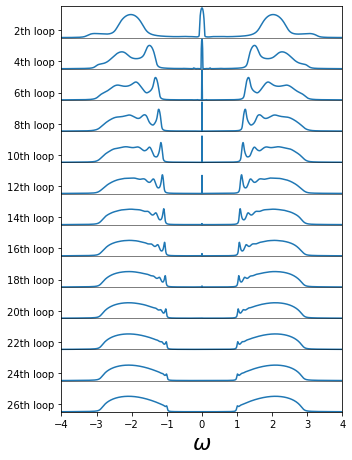

In [18]:
# %load plot_mit.py
r"""
===================================
The Metal Mott Insulator transition
===================================

Using a real frequency IPT solver follow the spectral function along
the metal to insulator transition.

"""
from __future__ import division, absolute_import, print_function

import numpy as np
import matplotlib.pylab as plt

import dmft.common as gf
import dmft.ipt_real as ipt
# %matplotlib inline

w = np.linspace(-4, 4, 2**12)
gloc = gf.semi_circle_hiltrans(w + 1e-3j,D=1)

UU = 4
Nloop = 13

urange = np.ones(Nloop)*UU
plt.close('all')

plt.figure(figsize=(5,Nloop*0.5))
for i, U in enumerate(urange):
    gloc, sigma_loc = ipt.ss_dmft_loop_once(gloc, w, U, 400, 1e-5)
    gloc, sigma_loc = ipt.ss_dmft_loop_once(gloc, w, U, 400, 1e-5)
    plt.gca().set_prop_cycle(None)
    shift = -2.1 * i
    plt.plot(w, shift + -gloc.imag)
    plt.axhline(shift, color='k', lw=0.5)

plt.xlabel(r'$\omega$')
plt.xlim([-4, 4])
plt.ylim([shift, 2.1])
plt.yticks(0.5 - 2.1 * np.arange(len(urange)), [str(2*(i+1)) + 'th loop' for i in range(len(urange))])
plt.show()

### 3. temperature dependency of QP peaks

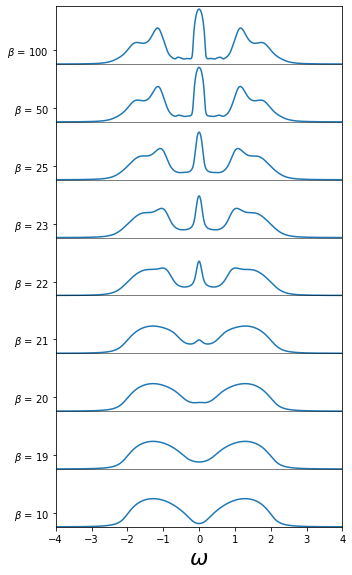

In [106]:
# %load plot_mit.py
r"""
===================================
The Metal Mott Insulator transition
===================================

Using a real frequency IPT solver follow the spectral function along
the metal to insulator transition.

"""
from __future__ import division, absolute_import, print_function

import numpy as np
import matplotlib.pylab as plt

import dmft.common as gf
import dmft.ipt_real as ipt
# %matplotlib inline

w = np.linspace(-4, 4, 2**12)
gloc = gf.semi_circle_hiltrans(w + 1e-3j)

UU = 2.5
Nloop = 13
beta_range = [100, 50, 25,23,22,21,20,19,10]
plt.close('all')

plt.figure(figsize=(5,len(beta_range)*0.9))
# plt.figure(figsize=(8,8))
for i, beta in enumerate(beta_range):
    gloc, sigma_loc = ipt.ss_dmft_loop(gloc, w, UU, beta, 1e-5)
    plt.gca().set_prop_cycle(None)
    shift = -2.1 * i
    plt.plot(w, shift + -gloc.imag)
#     label = r'$\beta$ = '+str(beta)
#     plt.plot(w, -gloc.imag, label = label)
    plt.axhline(shift, color='k', lw=0.5)
plt.xlabel(r'$\omega$')
plt.xlim([-4, 4])
plt.ylim([shift, 2.1])
plt.yticks(0.5 - 2.1 * np.arange(len(beta_range)), [r'$\beta$ = '+str(i) for i in beta_range])
# plt.legend()
plt.show()

###  4. peak width change according to band width


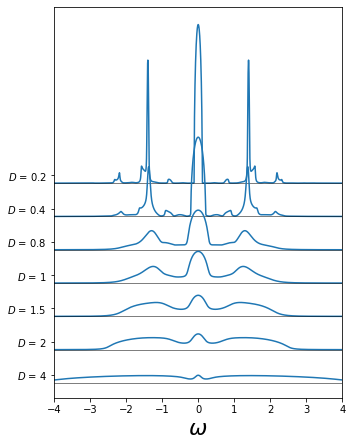

In [5]:
# %load plot_mit.py
r"""
===================================
The Metal Mott Insulator transition
===================================

Using a real frequency IPT solver follow the spectral function along
the metal to insulator transition.

"""
from __future__ import division, absolute_import, print_function

import numpy as np
import matplotlib.pylab as plt

import dmft.common as gf
import dmft.ipt_real as ipt
# %matplotlib inline

w = np.linspace(-4, 4, 2**12)

# D_range = np.linspace(0.7, 3, 10)
D_range = [0.2,0.4,0.8,1,1.5, 2, 4]
UU = 2

# Nloop = 13
plt.close('all')

plt.figure(figsize=(5,len(D_range)*0.9))
for i, DD in enumerate(D_range):
    gloc = gf.semi_circle_hiltrans(w + 1e-3j,D=DD)
    gloc, sigma_loc = ipt.ss_dmft_loop_D(gloc, w, UU, 100, 1e-5, D=DD)
    plt.gca().set_prop_cycle(None)
    shift = -2.1 * i
    plt.plot(w, shift + -gloc.imag)
#     label = r'$\beta$ = '+str(beta)
#     plt.plot(w, -gloc.imag, label = label)
    plt.axhline(shift, color='k', lw=0.5)
plt.xlabel(r'$\omega$')
plt.xlim([-4, 4])
# plt.ylim([shift, 2.1])
plt.yticks(0.5 - 2.1 * np.arange(len(D_range)), [r'$D$ = '+str(i) for i in D_range])
# plt.legend()
plt.show()

###  5. U/t dependence of MIT


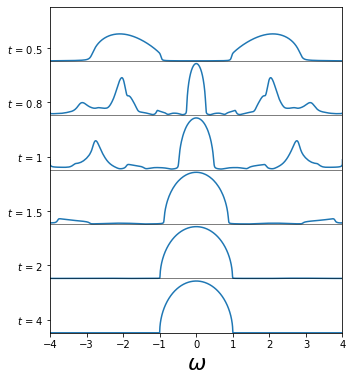

In [3]:
# %load plot_mit.py
r"""
===================================
The Metal Mott Insulator transition
===================================

Using a real frequency IPT solver follow the spectral function along
the metal to insulator transition.

"""
from __future__ import division, absolute_import, print_function

import numpy as np
import matplotlib.pylab as plt

import dmft.common as gf
import dmft.ipt_real as ipt
%matplotlib inline

w = np.linspace(-4, 4, 2**12)
2
t_range = [0.5,0.8,1,1.5, 2, 4]
UU = 4

# Nloop = 13
plt.close('all')

plt.figure(figsize=(5,len(t_range)*0.9))
for i, tt in enumerate(t_range):
    gloc = gf.semi_circle_hiltrans(w + 1e-3j)
    gloc, sigma_loc = ipt.ss_dmft_loop_t(gloc, w, UU, 100, 1e-5, t=tt)
    plt.gca().set_prop_cycle(None)
    shift = -2.1 * i

    plt.plot(w, shift + -gloc.imag)
#     label = r'$\beta$ = '+str(beta)
#     plt.plot(w, -gloc.imag, label = label)
    plt.axhline(shift, color='k', lw=0.5)
plt.xlabel(r'$\omega$')
plt.xlim([-4, 4])
plt.ylim([shift, 2.1])
plt.yticks(0.5 - 2.1 * np.arange(len(t_range)), [r'$t$ = '+str(i) for i in t_range])
# plt.legend()
plt.show()

# [2] 
